<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_7/Competitive_DS_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1.4

🤜 Универсальный ужиматель 🤛
Pandas по умолчанию загружает данные в память в неоптимальных типах с запасом, чтобы точно вошли любые знчения. Например, для хранения числа 1, будет зарезервировано максимально возможное количество памяти для целых чисел - int64, хотя достаточно int8. Хватит это терпеть!!! 😡

В ноутбуке этого урока мы реализовали функцию reduce_mem_usage, которая в автоматическом режиме анализирует данные в колонках и приводит их к оптимальному типу. В этой задаче надо будет её доработать до "Универсального ужимателя".

🧠 Задача: Добавьте в функцию reduce_mem_usage возможность оптимизации категориальных признаков (названия этих колонок передаются в cat_cols в аргументах функции). Про оптимзацию хранения категориальных признаков мы рассказывали в ноутбке к уроку.

In [ ]:
def reduce_mem_usage(df, cat_cols=[]):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    # print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name

        if col_type not in ['object', 'category', 'datetime64[ns, UTC]']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
      
    for col in cat_cols:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    # print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    # print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

# 7.1.5

Напишите генератор, который принимает массив натуральных чисел и максимальное возможное число в нем, а потом на каждой итерации возвращает OHE следующего элемента в массиве. Возвращаемый массив должен быть размерности (max_class + 1,)

In [ ]:
import numpy as np

def ohe_not_generator(numbers, max_class):
  arr = []
  for number in numbers:
    arr.append()

  return arr

In [ ]:
def ohe_generator(numbers, max_class):
  for number in numbers:
    

  return arr

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numbers = [[2, 3, 5], [6, 6, 6]]
max_class = 5

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(numbers)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
f = enc.transform(numbers)
f

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
s = pd.Series([1, 2, 4])
pd.get_dummies(s)

,1,2,4
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', max_categories=6)
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore', max_categories=6)

In [ ]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', max_categories=3)
enc.fit(s)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

df = load_dataset('penguins')
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['island']])
print(transformed.toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
df[['island']]

,island
0,Torgersen
1,Torgersen
2,Torgersen
3,Torgersen
4,Torgersen
...,...
339,Biscoe
340,Biscoe
341,Biscoe
342,Biscoe


In [ ]:
a = pd.DataFrame([1, 2, 3], columns=['num'])
a

,num
0,1
1,2
2,3


In [ ]:
ohe = OneHotEncoder(max_categories=6)
transformed = ohe.fit_transform(a[['num']])
print(transformed.toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
def ohe_generator(numbers, max_class):
  a = pd.DataFrame(numbers, columns=['num'])
  ohe = OneHotEncoder(max_categories=max_class)
  transformed = ohe.fit_transform(a[['num']])
  return transformed.toarray()

In [ ]:
ohe_generator([4, 5, 6], 80)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
def ohe_generator(numbers, max_class):
  for number in numbers:
    yield number

In [ ]:
print(ohe_generator([20, 30, 40], 6))

<generator object ohe_generator at 0x7f9347c1e340>


In [ ]:
double_gen = ohe_generator([20, 30, 40], 6)

for number in double_gen:
    print(number)

20
30
40


In [ ]:
def my_func_2():
  print("Сейчас отдам число")
  yield 1

In [ ]:
print(my_func_2())

<generator object my_func_2 at 0x7f9347c1ef10>


In [ ]:
print(next(my_func_2()))

Сейчас отдам число
1


In [ ]:
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



def ohe_not_generator(numbers, max_class):
  ass = []
  for num in numbers:
    # num_ = np.zeros((1, np.max(max_class) + 1))
    num_ = np.zeros(np.max(max_class) + 1)
    # print(num_)
    # print(num)
    num_[num] = 1
    # print(num_)
  #   num_[num] = 1
    ass.append(num_)
  return ass

In [ ]:
a = np.array([1, 2, 3])
b = [0, 0, 0, 0]
b[1] = 1
b

[0, 1, 0, 0]

In [ ]:
ohe_not_generator([1,2,3], 3)

[array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]

In [ ]:
[[0, 1, 2], [1,2,3]]

[[0, 1, 2], [1, 2, 3]]

In [ ]:
a = np.array([1, 0, 3])
b = np.zeros((a.size, a.max() + 1))
# b[np.arange(a.size), a] = 1

[np.arange(a.size), a]

[array([0, 1, 2]), array([1, 0, 3])]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def ohe_generator(numbers, max_class):
   for num in numbers:
     num_ = np.zeros(np.max(max_class) + 1)
     num_[num] = 1
     yield num_

In [ ]:
one = ohe_generator([1, 2, 3], 3)

In [ ]:
next(one)

array([0., 0., 1., 0.])

In [ ]:
np.zeros(3)

array([0., 0., 0.])

In [ ]:
values= [1, 0, 3]
n_values = np.max(values) + 1
np.eye(n_values)[values]
# array([[ 0.,  1.,  0.,  0.],
#        [ 1.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  1.]])


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
np.max(values)

3

# 7.1.8

Задача: У вас есть датасет df_cars. Напишите функцию, которая возвращает car_id, если данная строка датафрейма удовлетворяет условию, иначе -1.


Условие: либо year_to_start < 2015 и тип машины business, либо ее рейтинг строго больше 3 и ее модель это одна из ['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero']. 

Примечание: в этом задании будет оцениваться скорость вашего решения (помимо правильности), так что воспользуйтесь приведенными в видео приёмами и постарайтесь написать быстрый код.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/demo_car_train.csv')
df_cars.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug


In [ ]:
def get_where_simple(df_cars):

    cond_1 = ((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'business'))
    cond_2 = ((df_cars['car_rating'] > 3) & (df_cars['model'] in(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))
    if cond_1 or cond_2:
    # if cond_1:      
      return df_cars['car_id']
    else:
      return -1

In [ ]:
# df_cars['first'] = df_cars.apply(get_where_simple, axis = 1)
# df_cars.iloc[-1]= ['z19916105L',	'Smart ForFour',	'business',	'petrol',	2.44,	2013,	53465,	2017,	3,	'engine_ignition', 	None,	None]
df_cars['first'] = df_cars.apply(get_where_simple, axis = 1)
df_cars

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,first,second
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick,e-1431476C,e-1431476C
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check,L-6578341x,L-6578341x
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug,-1,-1
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake,-1,-1
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,r-1447767x,Kia Rio X-line,economy,petrol,5.46,2015,10613,2018,0,another_bug,-1,-1
996,y-1951166h,Kia Sportage,standart,petrol,4.70,2014,5047,2016,0,engine_ignition,-1,-1
997,P-5811265z,Hyundai Solaris,economy,petrol,5.38,2012,34890,2019,0,engine_check,P-5811265z,P-5811265z
998,F19998626N,Smart Coupe,economy,petrol,3.88,2017,55581,2015,0,engine_fuel,-1,-1


In [ ]:
# df_cars[df_cars['first'] != -1]

In [ ]:
df_cars['model'].isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])

0       True
1       True
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999     True
Name: model, Length: 1000, dtype: bool

In [ ]:
((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'bisiness'))
or ((df_cars['car_rating'] > 3) &  (df_cars['model'].isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero']))

In [ ]:
def get_where(df_cars):

    cond_1 = ((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'business'))
    cond_2 = ((df_cars['car_rating'] > 3) & (df_cars['model'].isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))
    conditions = [cond_1, cond_2]
    choices = [df_cars['car_id'], df_cars['car_id']]

    return np.select(conditions, choices, default=-1)

    # Ответ правильные, но работает долго. Ваше решение работает 0.635 секунд, а надо меньше чем 0.105

In [ ]:
# get_where(df_cars)

In [ ]:
df_cars['second'] = get_where(df_cars)
df_cars

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,first,second
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick,e-1431476C,e-1431476C
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check,L-6578341x,L-6578341x
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug,-1,-1
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake,-1,-1
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,r-1447767x,Kia Rio X-line,economy,petrol,5.46,2015,10613,2018,0,another_bug,-1,-1
996,y-1951166h,Kia Sportage,standart,petrol,4.70,2014,5047,2016,0,engine_ignition,-1,-1
997,P-5811265z,Hyundai Solaris,economy,petrol,5.38,2012,34890,2019,0,engine_check,P-5811265z,P-5811265z
998,F19998626N,Smart Coupe,economy,petrol,3.88,2017,55581,2015,0,engine_fuel,-1,-1


In [ ]:
def get_where(df_cars):

    cond_1 = ((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'business'))
    cond_2 = ((df_cars['car_rating'] > 3) & (df_cars['model'].isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))
    return np.where((cond_1 | cond_2), df_cars['car_id'].values, -1)

    # cond_1 = ((df_cars['year_to_start'].values() < 2015) & (df_cars['car_type'].values() == 'business'))
    # cond_2 = ((df_cars['car_rating'].values() > 3) & (df_cars['model'].values().isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))
    # return np.where((cond_1 | cond_2), df_cars['car_id'].values, -1)

#         assert False, f'Ответ правильные, но работает долго. Ваше решение работает {round(sol_time, 3)} секунд, а надо меньше чем {round(0.15 * coef, 3)}'
# AssertionError: Ответ правильные, но работает долго. Ваше решение работает 0.537 секунд, а надо меньше чем 0.088

In [ ]:
df_cars['third'] = get_where(df_cars)
df_cars

TypeError: ignored

In [ ]:
def get_where(df_cars):


    # a = df_cars['model']
    # b = ['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero']

    st = set(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])

    cond_1 = ((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'business'))
    cond_2 = ((df_cars['car_rating'] > 3) & ([el in st for el in df_cars['model']]))
    return np.where((cond_1 | cond_2), df_cars['car_id'].values, -1)


df_cars['four'] = get_where(df_cars)
df_cars

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,first,second,third,four
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick,e-1431476C,e-1431476C,e-1431476C,e-1431476C
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check,L-6578341x,L-6578341x,L-6578341x,L-6578341x
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug,-1,-1,-1,-1
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake,-1,-1,-1,-1
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,r-1447767x,Kia Rio X-line,economy,petrol,5.46,2015,10613,2018,0,another_bug,-1,-1,-1,-1
996,y-1951166h,Kia Sportage,standart,petrol,4.70,2014,5047,2016,0,engine_ignition,-1,-1,-1,-1
997,P-5811265z,Hyundai Solaris,economy,petrol,5.38,2012,34890,2019,0,engine_check,P-5811265z,P-5811265z,P-5811265z,P-5811265z
998,F19998626N,Smart Coupe,economy,petrol,3.88,2017,55581,2015,0,engine_fuel,-1,-1,-1,-1


In [ ]:
def get_where(df_cars):

    st = set(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])

    conditions = [((df_cars['year_to_start'] < 2015) & (df_cars['car_type'] == 'business')), ((df_cars['car_rating'] > 3) & (df_cars['model'].isin(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))]
    choices = [df_cars['car_id'], df_cars['car_id']]

    return np.select(conditions, choices, default=-1)

In [ ]:
def get_where(df_cars):

    cond_1 = ((df_cars['year_to_start'].values < 2015) & (df_cars['car_type'].values == 'business'))
    cond_2 = ((df_cars['car_rating'].values > 3) & (df_cars['model'].values  in(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero'])))
    return np.where((cond_1 | cond_2), df_cars['car_id'].values, -1)

df_cars['fifth'] = get_where(df_cars)
df_cars

ValueError: ignored

In [ ]:
# my

def get_where(df_cars):
    return np.where((((df_cars['year_to_start'].values < 2015) & (df_cars['car_type'].values == 'business')) | ((df_cars['car_rating'].values > 3) & ([el in set(['Hyundai Solaris', 'Smart ForFour', 'Renault Kaptur', 'Renault Sandero']) for el in df_cars['model']]))), df_cars['car_id'].values, -1)

# 7.1.10

Вам дана функция, которая принимает на вход словарь значений и выдает какое-то число. Объявите векторизованную версию этой функции и запишите ее в переменную vectfunc.

In [ ]:
def f(x):
    if 'Audi' == x['model']:
        if x['car_rating'] > 3:
            return 0
        else:
            if x['fuel_type'] == 'petrol':
                return 1
            return np.nan
    elif x['year_to_start'] in [2015, 2016, 2017] or x['car_rating'] > 4:
        return round(x['car_rating'] - 4.5, 3) * 10
    else:
        return 3

Примечание: во время проверки ваша функция будет вызываться при помощи следующего кода:

preds = vectfunc(df_cars['car_rating'], df_cars['model'], df_cars['year_to_start'], df_cars['fuel_type'])

In [ ]:
# my

import numpy as np

def f(car_rating, model, year_to_start, fuel_type):
    if 'Audi' == model:
        if car_rating > 3:
            return 0
        else:
            if fuel_type == 'petrol':
                return 1
            return np.nan
    elif year_to_start in [2015, 2016, 2017] or car_rating > 4:
        return round(car_rating - 4.5, 3) * 10
    else:
        return 3

vectfunc = np.vectorize(f)

# 7.1.11

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/demo_car_train.csv')
df_cars.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug


In [ ]:
def f(x):
    if 'Audi' == x['model']:
        if x['car_rating'] > 3:
            return 0
        else:
            if x['fuel_type'] == 'petrol':
                return 1
            return np.nan
    elif x['year_to_start'] in [2015, 2016, 2017] or x['car_rating'] > 4:
        return round(x['car_rating'] - 4.5, 3) * 10
    else:
        return 3

In [ ]:
df_cars.iloc[-1] = ['z19916105L',	'Audi',	'economy',	'non',	2.44,	2017,	53465,	2017,	3,	'engine_ignition']
df_cars.iloc[998] = ['z19916105L',	'Audi',	'economy',	'petrol',	3,	2017,	53465,	2017,	3,	'engine_ignition']
df_cars.iloc[997] = ['z19916105L',	'Audi',	'economy',	'petrol',	3.5,	2017,	53465,	2017,	3,	'engine_ignition']

In [ ]:
df_cars['simple'] = df_cars.apply(f, axis=1)
df_cars

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,simple
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick,3.4
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check,3.4
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug,-3.4
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake,8.0
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug,0.4
...,...,...,...,...,...,...,...,...,...,...,...
995,r-1447767x,Kia Rio X-line,economy,petrol,5.46,2015,10613,2018,0,another_bug,9.6
996,y-1951166h,Kia Sportage,standart,petrol,4.70,2014,5047,2016,0,engine_ignition,2.0
997,z19916105L,Audi,economy,petrol,3.50,2017,53465,2017,3,engine_ignition,0.0
998,z19916105L,Audi,economy,petrol,3.00,2017,53465,2017,3,engine_ignition,1.0


In [ ]:
conditions = [((df_cars['model'] == 'Audi') & (df_cars['car_rating'] > 3)),              
              ((df_cars['model'] == 'Audi') & (df_cars['car_rating'] <= 3) & (df_cars['fuel_type'] == 'petrol')),
              ((df_cars['model'] == 'Audi')),
              ((df_cars['model'] != 'Audi') & (df_cars['year_to_start'].isin([2015, 2016, 2017])
               #| df_cars['car_rating'] > 4
               )),
              ((df_cars['model'] != 'Audi') & (df_cars['car_rating'] > 4))
              
              ]

choices = [0, 1, np.nan,  round(df_cars['car_rating'] - 4.5, 3) * 10,  round(df_cars['car_rating'] - 4.5, 3) * 10]
default_value = 3

df_cars['not_simple'] = np.select(conditions, choices, default=default_value)
df_cars

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,simple,not_simple
0,e-1431476C,Renault Kaptur,standart,petrol,4.84,2014,3856,2017,2,gear_stick,3.4,3.4
1,L-6578341x,Renault Sandero,standart,petrol,4.84,2011,54093,2018,0,engine_check,3.4,3.4
2,i11115813c,Skoda Rapid,economy,petrol,4.16,2015,16214,2017,0,electro_bug,-3.4,-3.4
3,w-1250035f,Kia Rio X-line,economy,petrol,5.30,2015,16948,2017,1,wheel_shake,8.0,8.0
4,E-3430793T,Smart Coupe,economy,petrol,4.54,2015,20430,2014,1,break_bug,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,r-1447767x,Kia Rio X-line,economy,petrol,5.46,2015,10613,2018,0,another_bug,9.6,9.6
996,y-1951166h,Kia Sportage,standart,petrol,4.70,2014,5047,2016,0,engine_ignition,2.0,2.0
997,z19916105L,Audi,economy,petrol,3.50,2017,53465,2017,3,engine_ignition,0.0,0.0
998,z19916105L,Audi,economy,petrol,3.00,2017,53465,2017,3,engine_ignition,1.0,1.0


# 7.1.13

In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing



def fast_groupby(df_cars):

    count_values = np.bincount(df_cars['int_model'])
    sum_values = np.bincount(df_cars['int_model'], weights=df_cars['target_reg'])
    mean_values = sum_values / count_values

    indices = df_cars['int_model']
    min_values = np.minimum.reduceat(df_cars['target_reg'].values[np.argsort(indices)],
                                 np.concatenate(([0], np.cumsum(np.bincount(indices))))[:-1])


    res = pd.DataFrame({'int_model': np.arange(len(min_values)),
                        'min': min_values,
                        'sum': sum_values,
                        'count': count_values,
                        'mean': mean_values})
    return res

#7.1.16

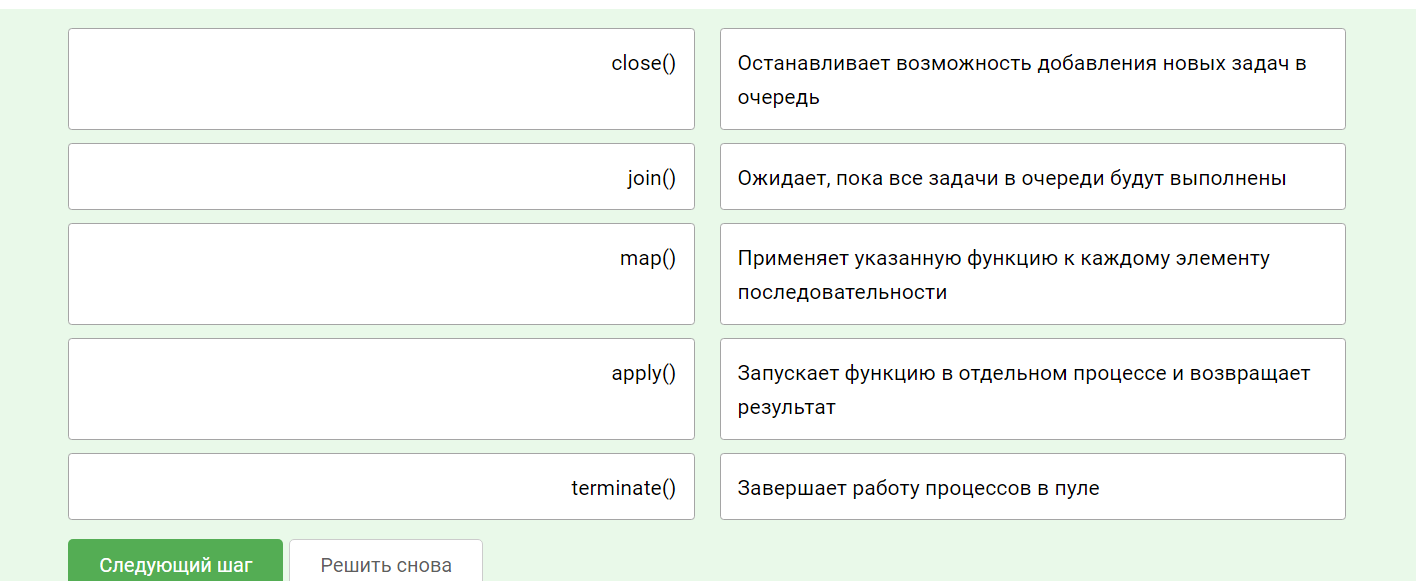

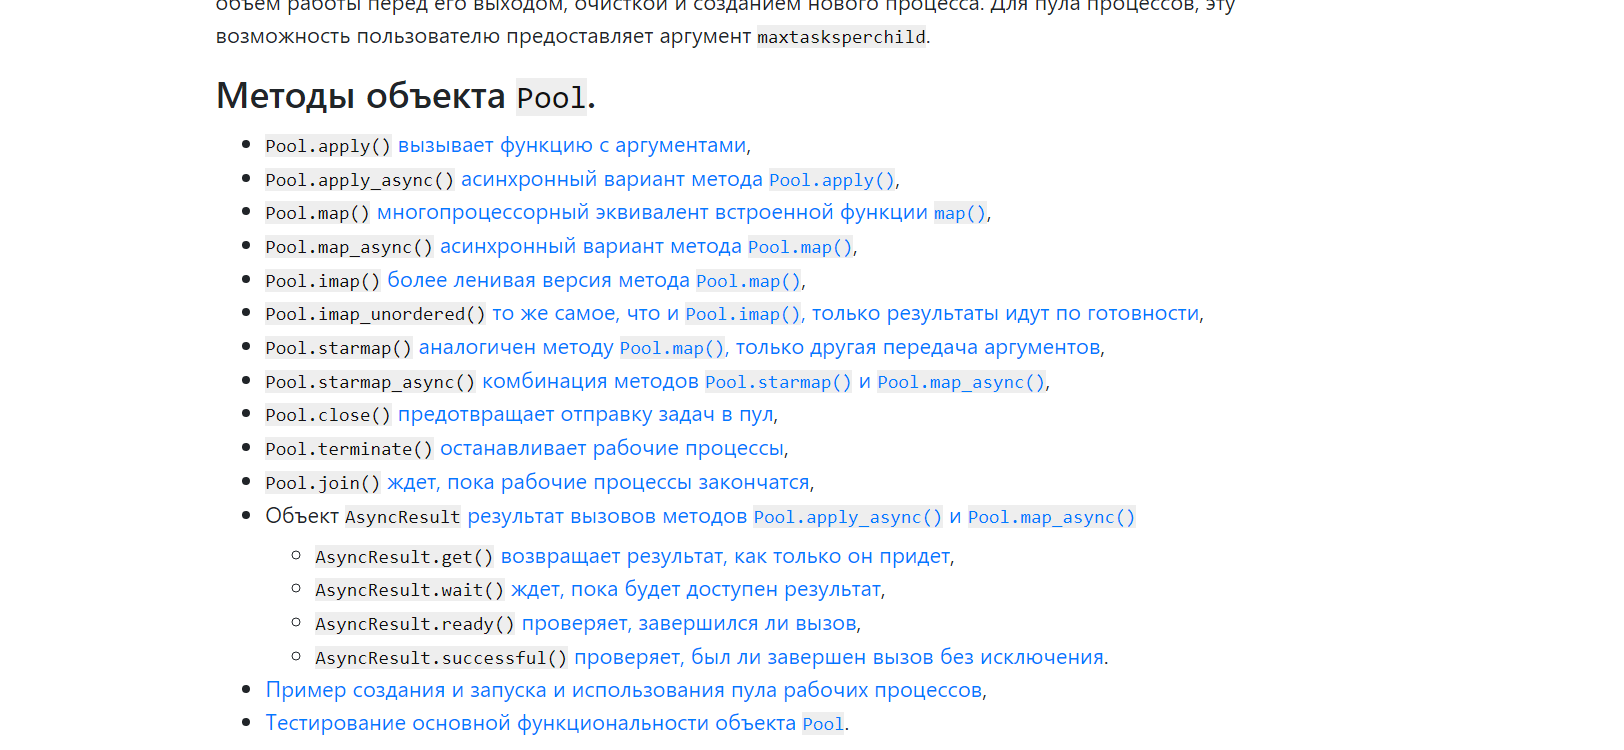

https://docs-python.ru/standart-library/paket-multiprocessing-python/klass-pool-modulja-multiprocessing/